In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import backend as K
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [2]:
(train_images, train_targets), (test_images, test_targets) = mnist.load_data()

train_images = train_images.reshape(-1, 28, 28, 1)
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape(-1, 28, 28, 1)
test_images = test_images.astype('float32') / 255

train_targets = to_categorical(train_targets)
test_targets = to_categorical(test_targets)

val_x = train_images[:10000]
val_y = train_targets[:10000]

train_x = train_images[:10000]
train_y = train_targets[:10000]

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/home/eugene/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,962 (148.29 KB)

 Trainable params: 37,962 (148.29 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(train_x, train_y, batch_size=128, epochs=15, validation_data=(val_x, val_y))

Epoch 1/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5898 - loss: 1.3724 - val_accuracy: 0.8150 - val_loss: 0.5441
Epoch 2/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8802 - loss: 0.3600 - val_accuracy: 0.8306 - val_loss: 0.5460
Epoch 3/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9193 - loss: 0.2615 - val_accuracy: 0.9163 - val_loss: 0.2642
Epoch 4/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9428 - loss: 0.1843 - val_accuracy: 0.9242 - val_loss: 0.2293
Epoch 5/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9548 - loss: 0.1495 - val_accuracy: 0.9550 - val_loss: 0.1469
Epoch 6/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9700 - loss: 0.0978 - val_accuracy: 0.9593 - val_loss: 0.1317
Epoch 7/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9722 - loss: 0.0961 - val_accuracy: 0.9705 - val_loss: 0.0925
Epoch 8/15
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9739 - loss: 0.0799 - val_accuracy: 0.9804 - v

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9774 - loss: 0.0755
0.9815999865531921


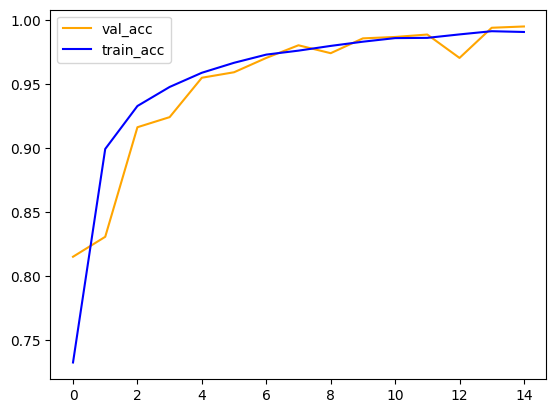

In [5]:
epoch = history.epoch
val_acc = history.history['val_accuracy']
train_acc = history.history['accuracy']

plt.plot(epoch, val_acc, color='orange', label='val_acc')
plt.plot(epoch, train_acc, color='blue', label='train_acc')
plt.legend()

_, acc = model.evaluate(test_images, test_targets)
print(acc)

In [6]:
def print_maps_of_samples(k: int=0) -> None:
    # Попробуем отобразить промежуточные карты признаков модели
    layer_outputs = [layer.output for layer in model.layers[:5]]  # извлечение вывода верхних 5-ти слоёв
    activation_model = models.Model(inputs=model.inputs, outputs=layer_outputs)  # Создание модели, которая вернёт эти вывода с учётом заданного входа

    img = test_images[k]
    plt.imshow(img)
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.0

    activations = activation_model.predict(img_tensor)

    layer_names = []
    for layer in model.layers[:5]:
        layer_names.append(layers)

    images_per_row = 16
    for layer_name, layer_activation in zip(layer_names, activations):
        n_features = layer_activation.shape[-1]

        size = layer_activation.shape[1]

        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0, :, :, col * images_per_row + row]
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size, row * size : (row + 1) * size] = channel_image

        scale = 1 / size
        plt.figure(figsize=(scale * display_grid.shape[1], scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


/home/eugene/.local/lib/python3.10/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['keras_tensor']. Received: the structure of inputs=*
  warnings.warn(
/tmp/ipykernel_5788/2925492517.py:31: RuntimeWarning: invalid value encountered in divide
  channel_image /= channel_image.std()
/tmp/ipykernel_5788/2925492517.py:34: RuntimeWarning: invalid value encountered in cast
  channel_image = np.clip(channel_image, 0, 255).astype('uint8')


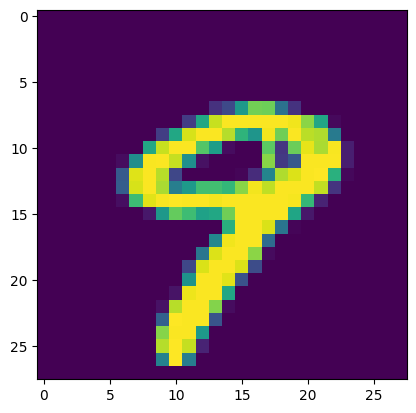

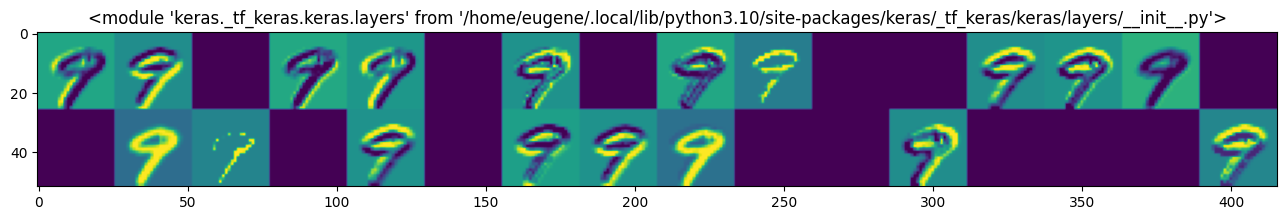

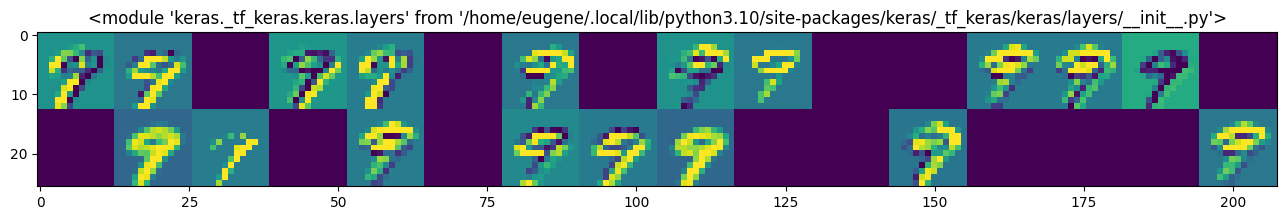

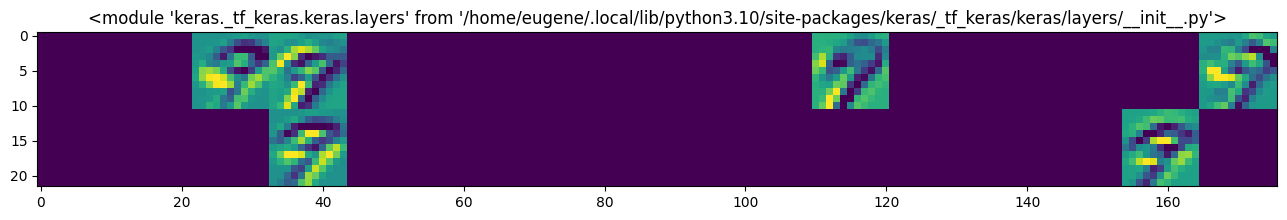

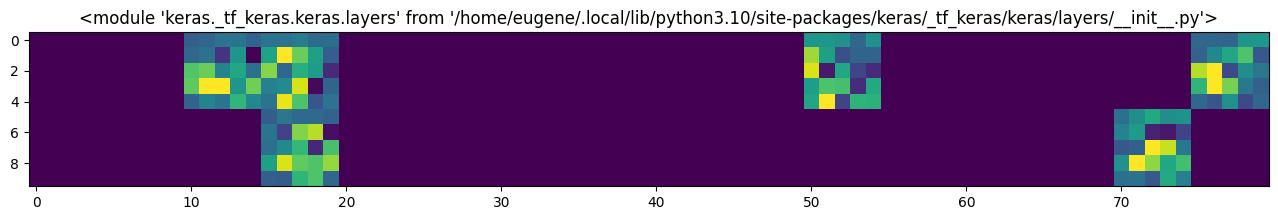

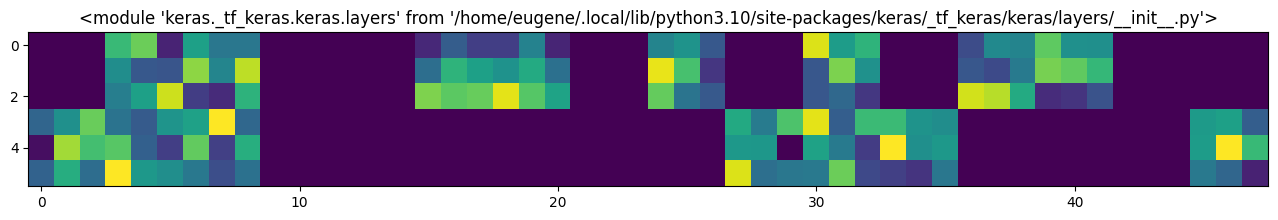

In [7]:
print_maps_of_samples(9)
# k = 2, 5